# CSV to GeoJSON
This is an example to show how we can use pandas and geopandas to transform CSV file to GeoJSON file

In [152]:
# Import modules
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import os

In [153]:
# Constants
INPUT_DIR = "../input"
OUTPUT_DIR = "../output"

In [154]:
# Load dataset into dataframe
dataframe = pd.read_csv(os.path.join(INPUT_DIR, 'crash_data.csv'))
dataframe.shape

(163, 10)

In [155]:
# Show dataframe
dataframe.head()

,state,county,city,year,date,hour,minute,deaths,lat,lng
0,TEXAS,DALLAS,DALLAS,2016,2016-5-21,0,56,1,32.860300,-96.857142
1,TEXAS,DALLAS,DALLAS,2017,2017-11-23,3,25,1,32.706042,-96.739492
2,TEXAS,DALLAS,DALLAS,2017,2017-11-3,21,55,1,32.662114,-96.726753
3,TEXAS,DALLAS,DALLAS,2017,2017-5-23,18,3,1,32.792953,-96.741636
4,TEXAS,TARRANT,FORT WORTH,2016,2016-1-22,16,12,1,32.989797,-97.344256


In [156]:
# Create a geodataframe from dataframe
geodataframe = gpd.GeoDataFrame(dataframe, geometry=gpd.points_from_xy(dataframe.lng, dataframe.lat))
geodataframe.shape

(163, 11)

In [157]:
# Show geodataframe
geodataframe.head()

,state,county,city,year,date,hour,minute,deaths,lat,lng,geometry
0,TEXAS,DALLAS,DALLAS,2016,2016-5-21,0,56,1,32.860300,-96.857142,POINT (-96.85714 32.86030)
1,TEXAS,DALLAS,DALLAS,2017,2017-11-23,3,25,1,32.706042,-96.739492,POINT (-96.73949 32.70604)
2,TEXAS,DALLAS,DALLAS,2017,2017-11-3,21,55,1,32.662114,-96.726753,POINT (-96.72675 32.66211)
3,TEXAS,DALLAS,DALLAS,2017,2017-5-23,18,3,1,32.792953,-96.741636,POINT (-96.74164 32.79295)
4,TEXAS,TARRANT,FORT WORTH,2016,2016-1-22,16,12,1,32.989797,-97.344256,POINT (-97.34426 32.98980)


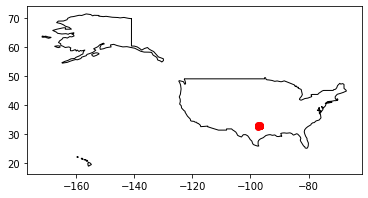

In [158]:
# Plot the coordinates over a country-level map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# We restrict to United States of America
ax = world[world.name == 'United States of America'].plot(
    color='white', edgecolor='black')

# We can now plot our GeoDataFrame
geodataframe.plot(ax=ax, color='red')

# Save PNG image
plt.savefig(os.path.join(OUTPUT_DIR, 'crash_data.png'))

# Plot GeoDataFrame
plt.show()

In [159]:
# Save GeoJSON from GeoDataFrame
geodataframe.to_file(os.path.join(OUTPUT_DIR, 'crash_data.geojson'), driver='GeoJSON')